In [22]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C222", "C223"]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [24]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2024-01-19 16:11:43,782][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 16 sessions for C214 between 2024-01-03 and 2024-01-18
fetched 16 sessions for C215 between 2024-01-03 and 2024-01-18
Not all variables are the same length. Cannot create proper DataFrame
result: 7
hits: 7
violations: 7
temperror: 7
hit_rate: 6
error_rate: 6
violation_rate: 6
temp_error_rate: 6
n_lpokes: 6
n_cpokes: 6
n_rpokes: 6
trial_dur: 6
trial_start: 6
valid_early_spoke: 6
first_spoke: 6
first_lpoke: 6
first_rpoke: 6
n_settling_ins: 6
avg_settling_in: 6
cpoke_dur: 6
n_incorr_spokes_during_give_del: 6
stage: 6
curriculum: 6
sides: 7
SMA_set: 6
is_match: 7
sa: 6
sb: 6
stimuli_on: 6
settling_in_dur: 6
legal_cbreak_dur: 6
pre_dur: 6
adj_pre_dur: 6
stimulus_dur: 6
delay_dur: 6
post_dur: 6
sb_extra_dur: 6
viol_off_dur: 6
pre_go_dur: 6
inter_trial_dur: 6
go_type: 6
go_dur: 6
give_type_set: 6
give_type_imp: 6
give_frac: 6
give_delay_dur: 6
give_xtra_light_delay_dur: 6
give_use: 7
replay_on: 6
timeouts: 7
water_delivered: 7
give_water_not_drunk: 7
crash_hist: 6
pro_stim_set: 6
anti

In [25]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS + ["C222"], date_min=date_min, date_max=date_max
# )
f_name = "C2s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-12-29 -> 2024-01-18
Returning appended df with entries between 2023-12-29 and 2024-01-18
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\C2s_days_df.csv


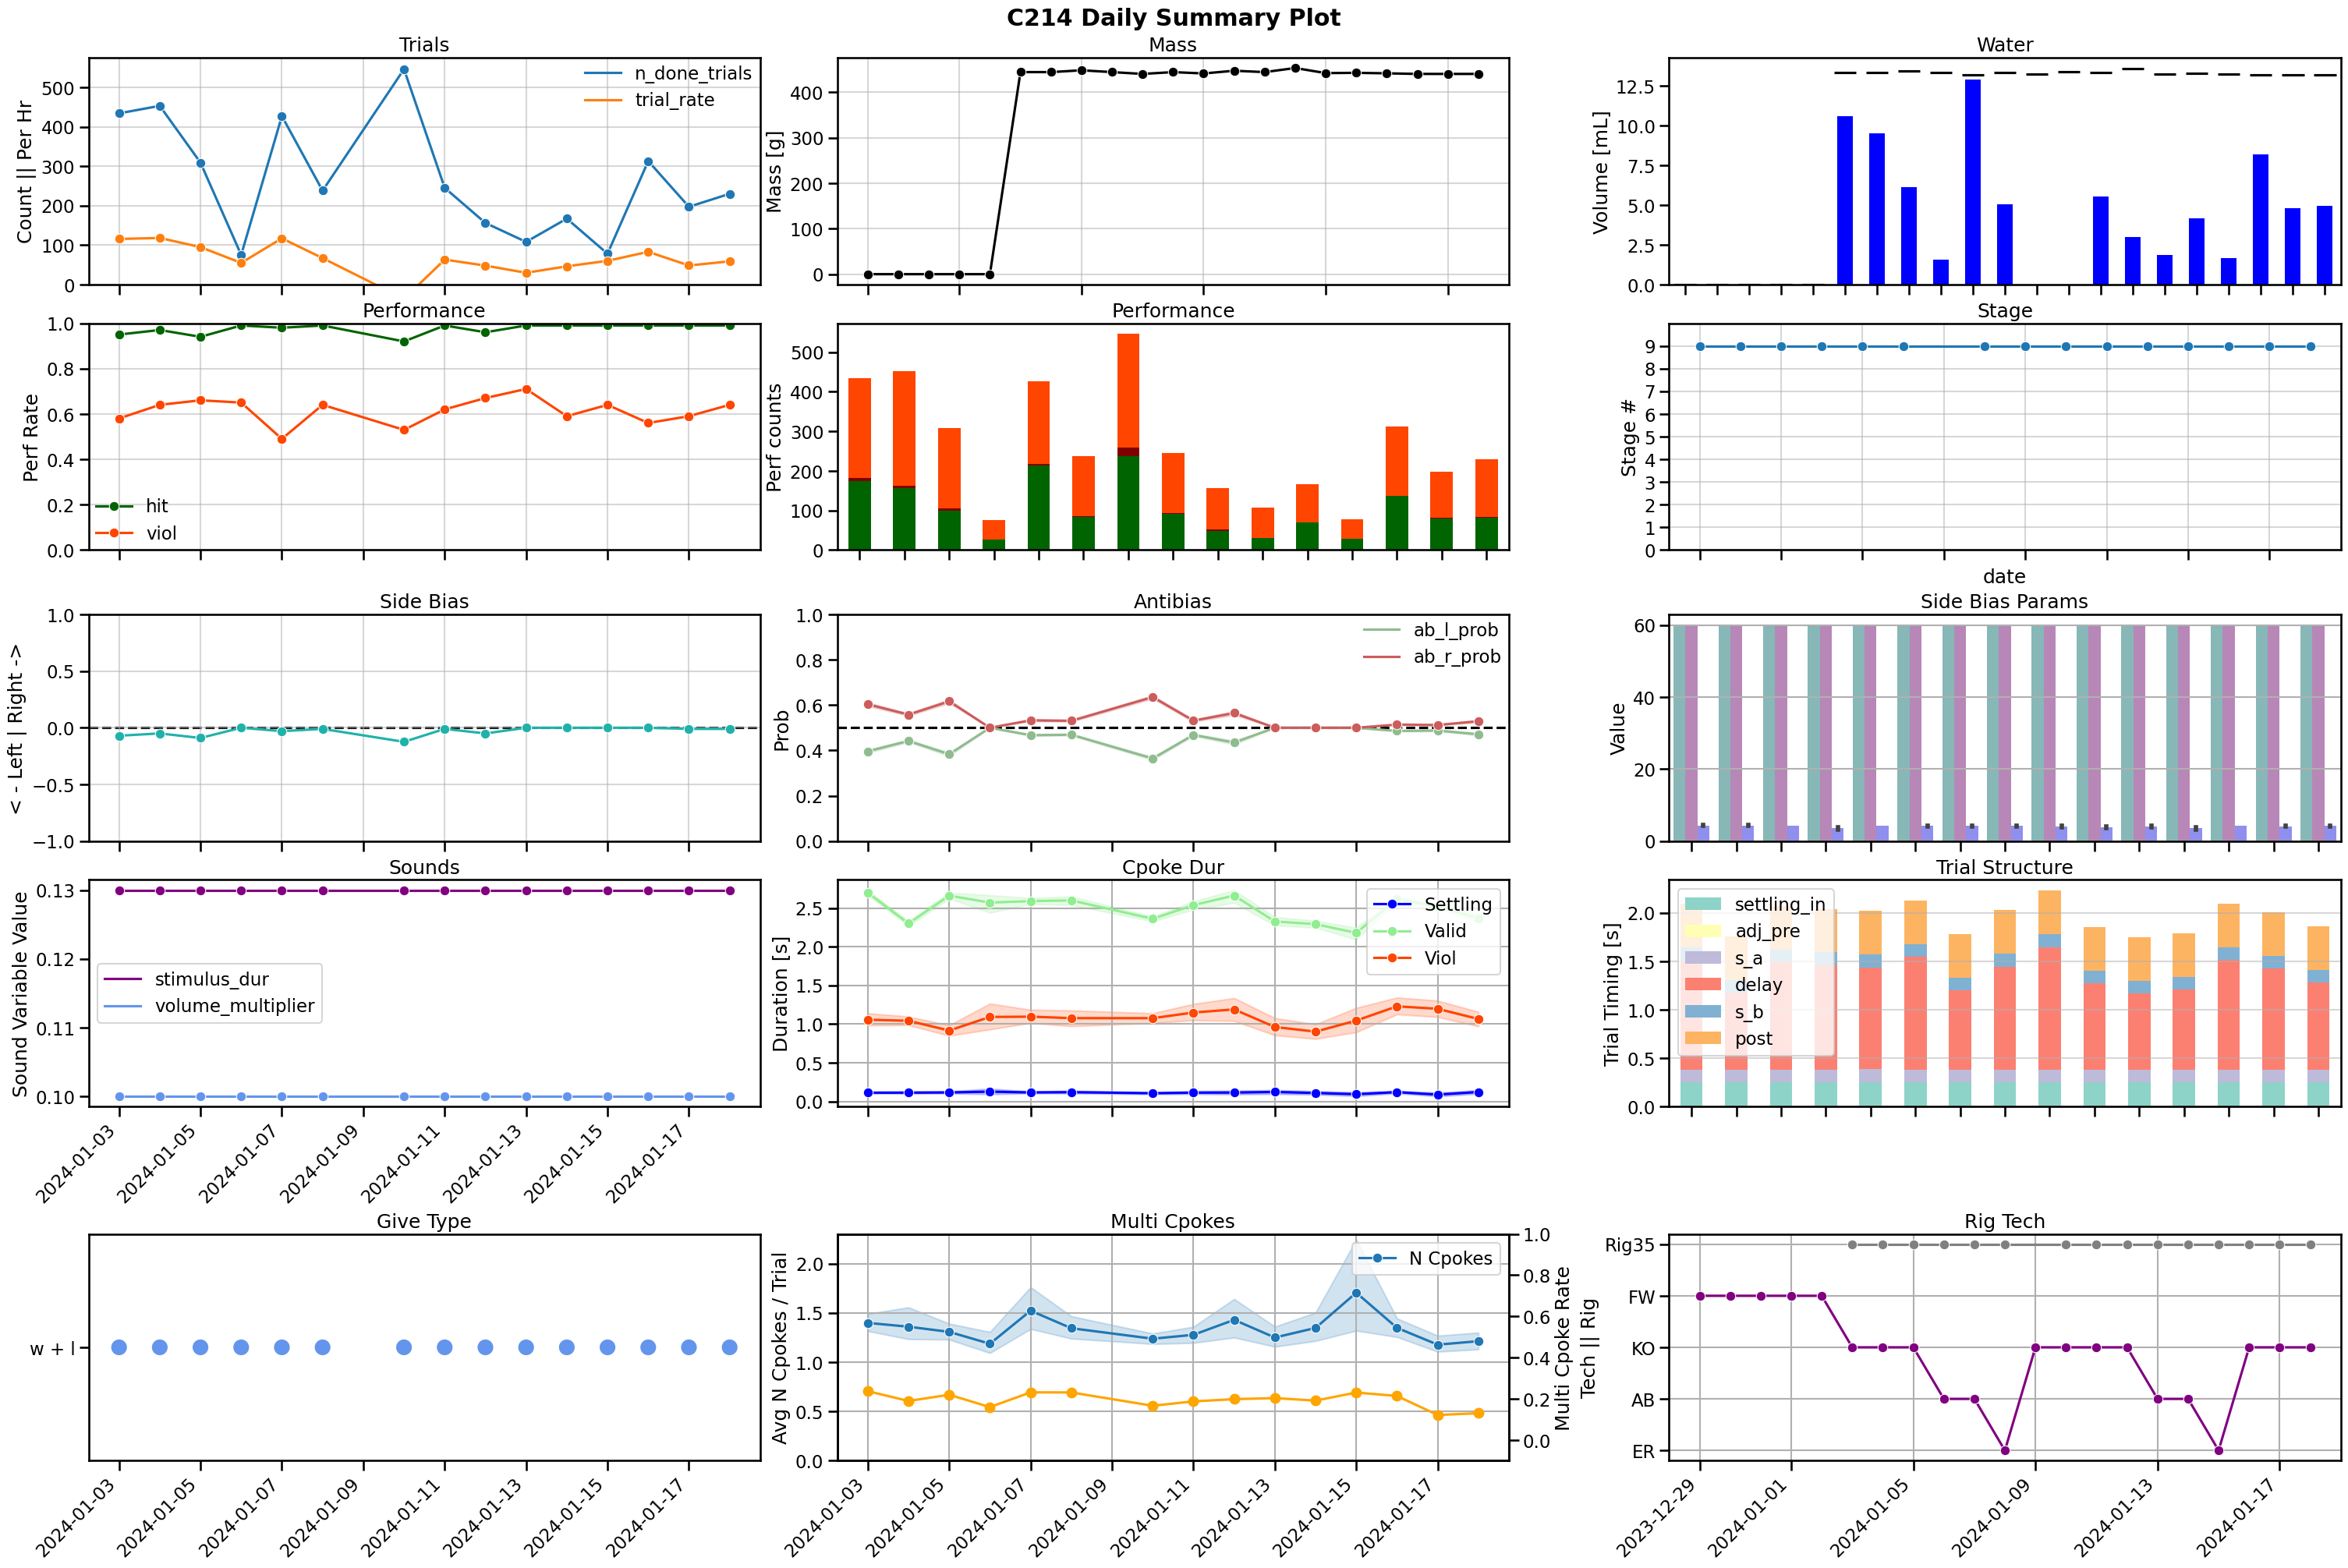

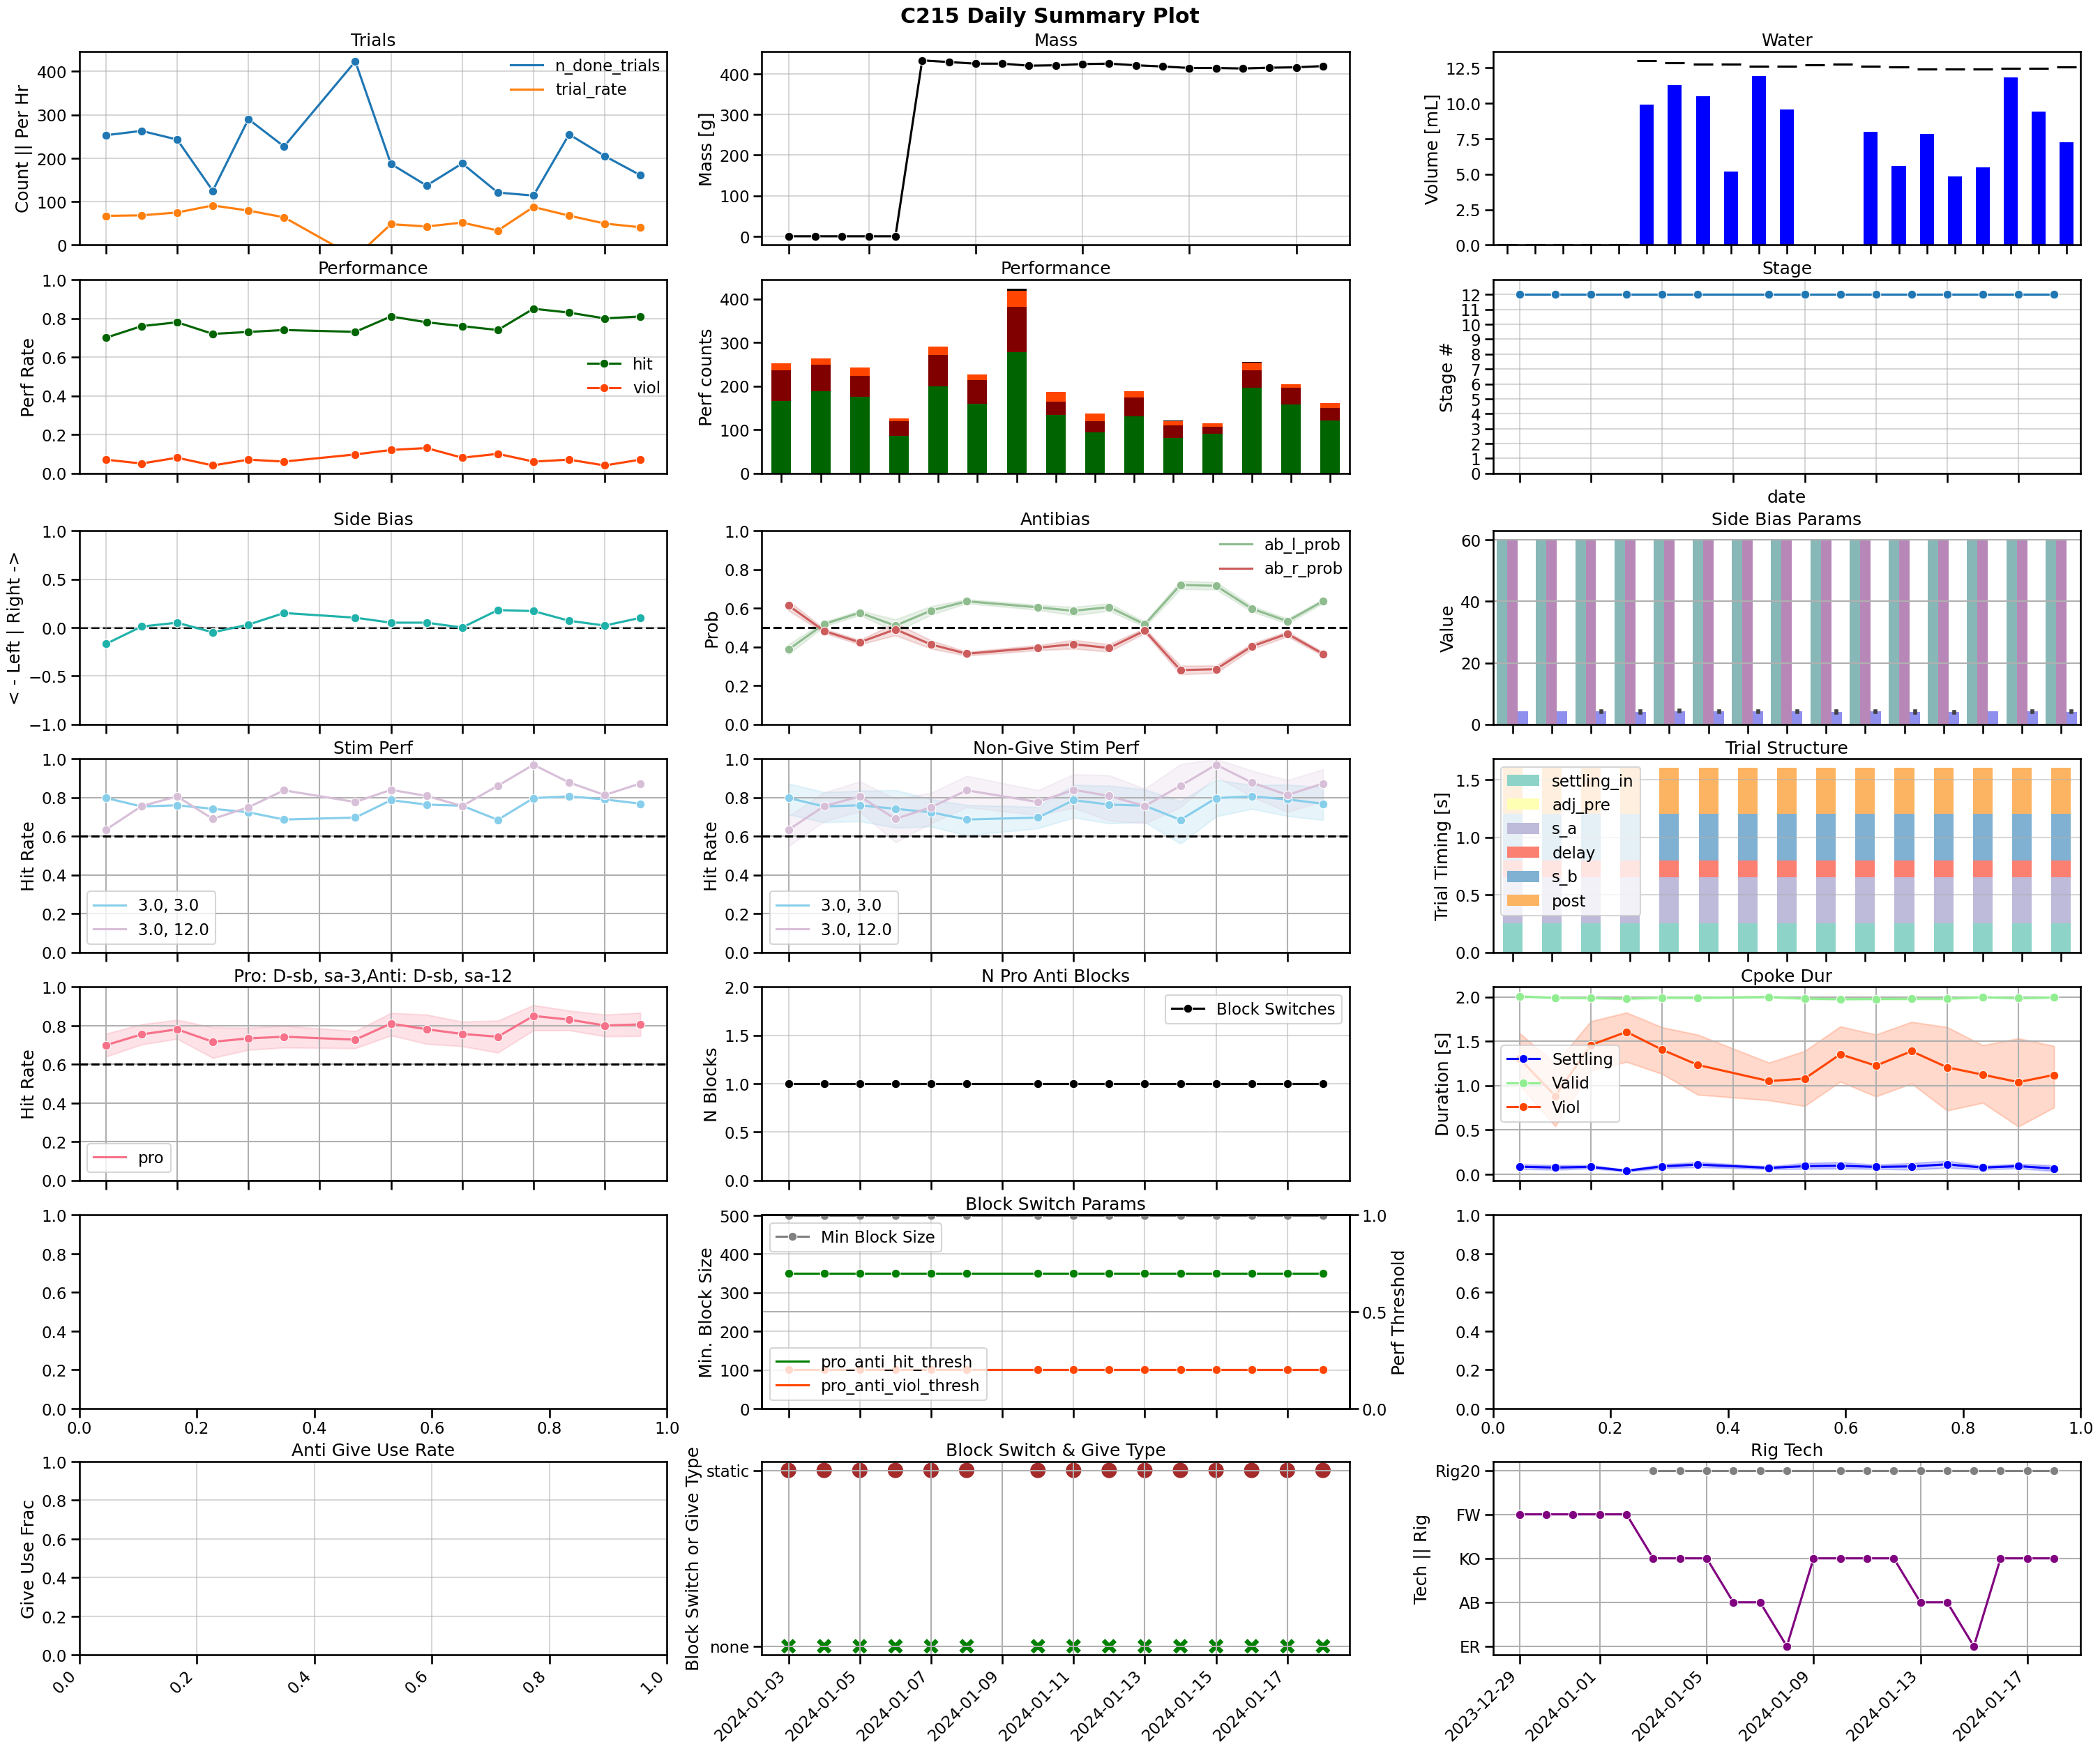

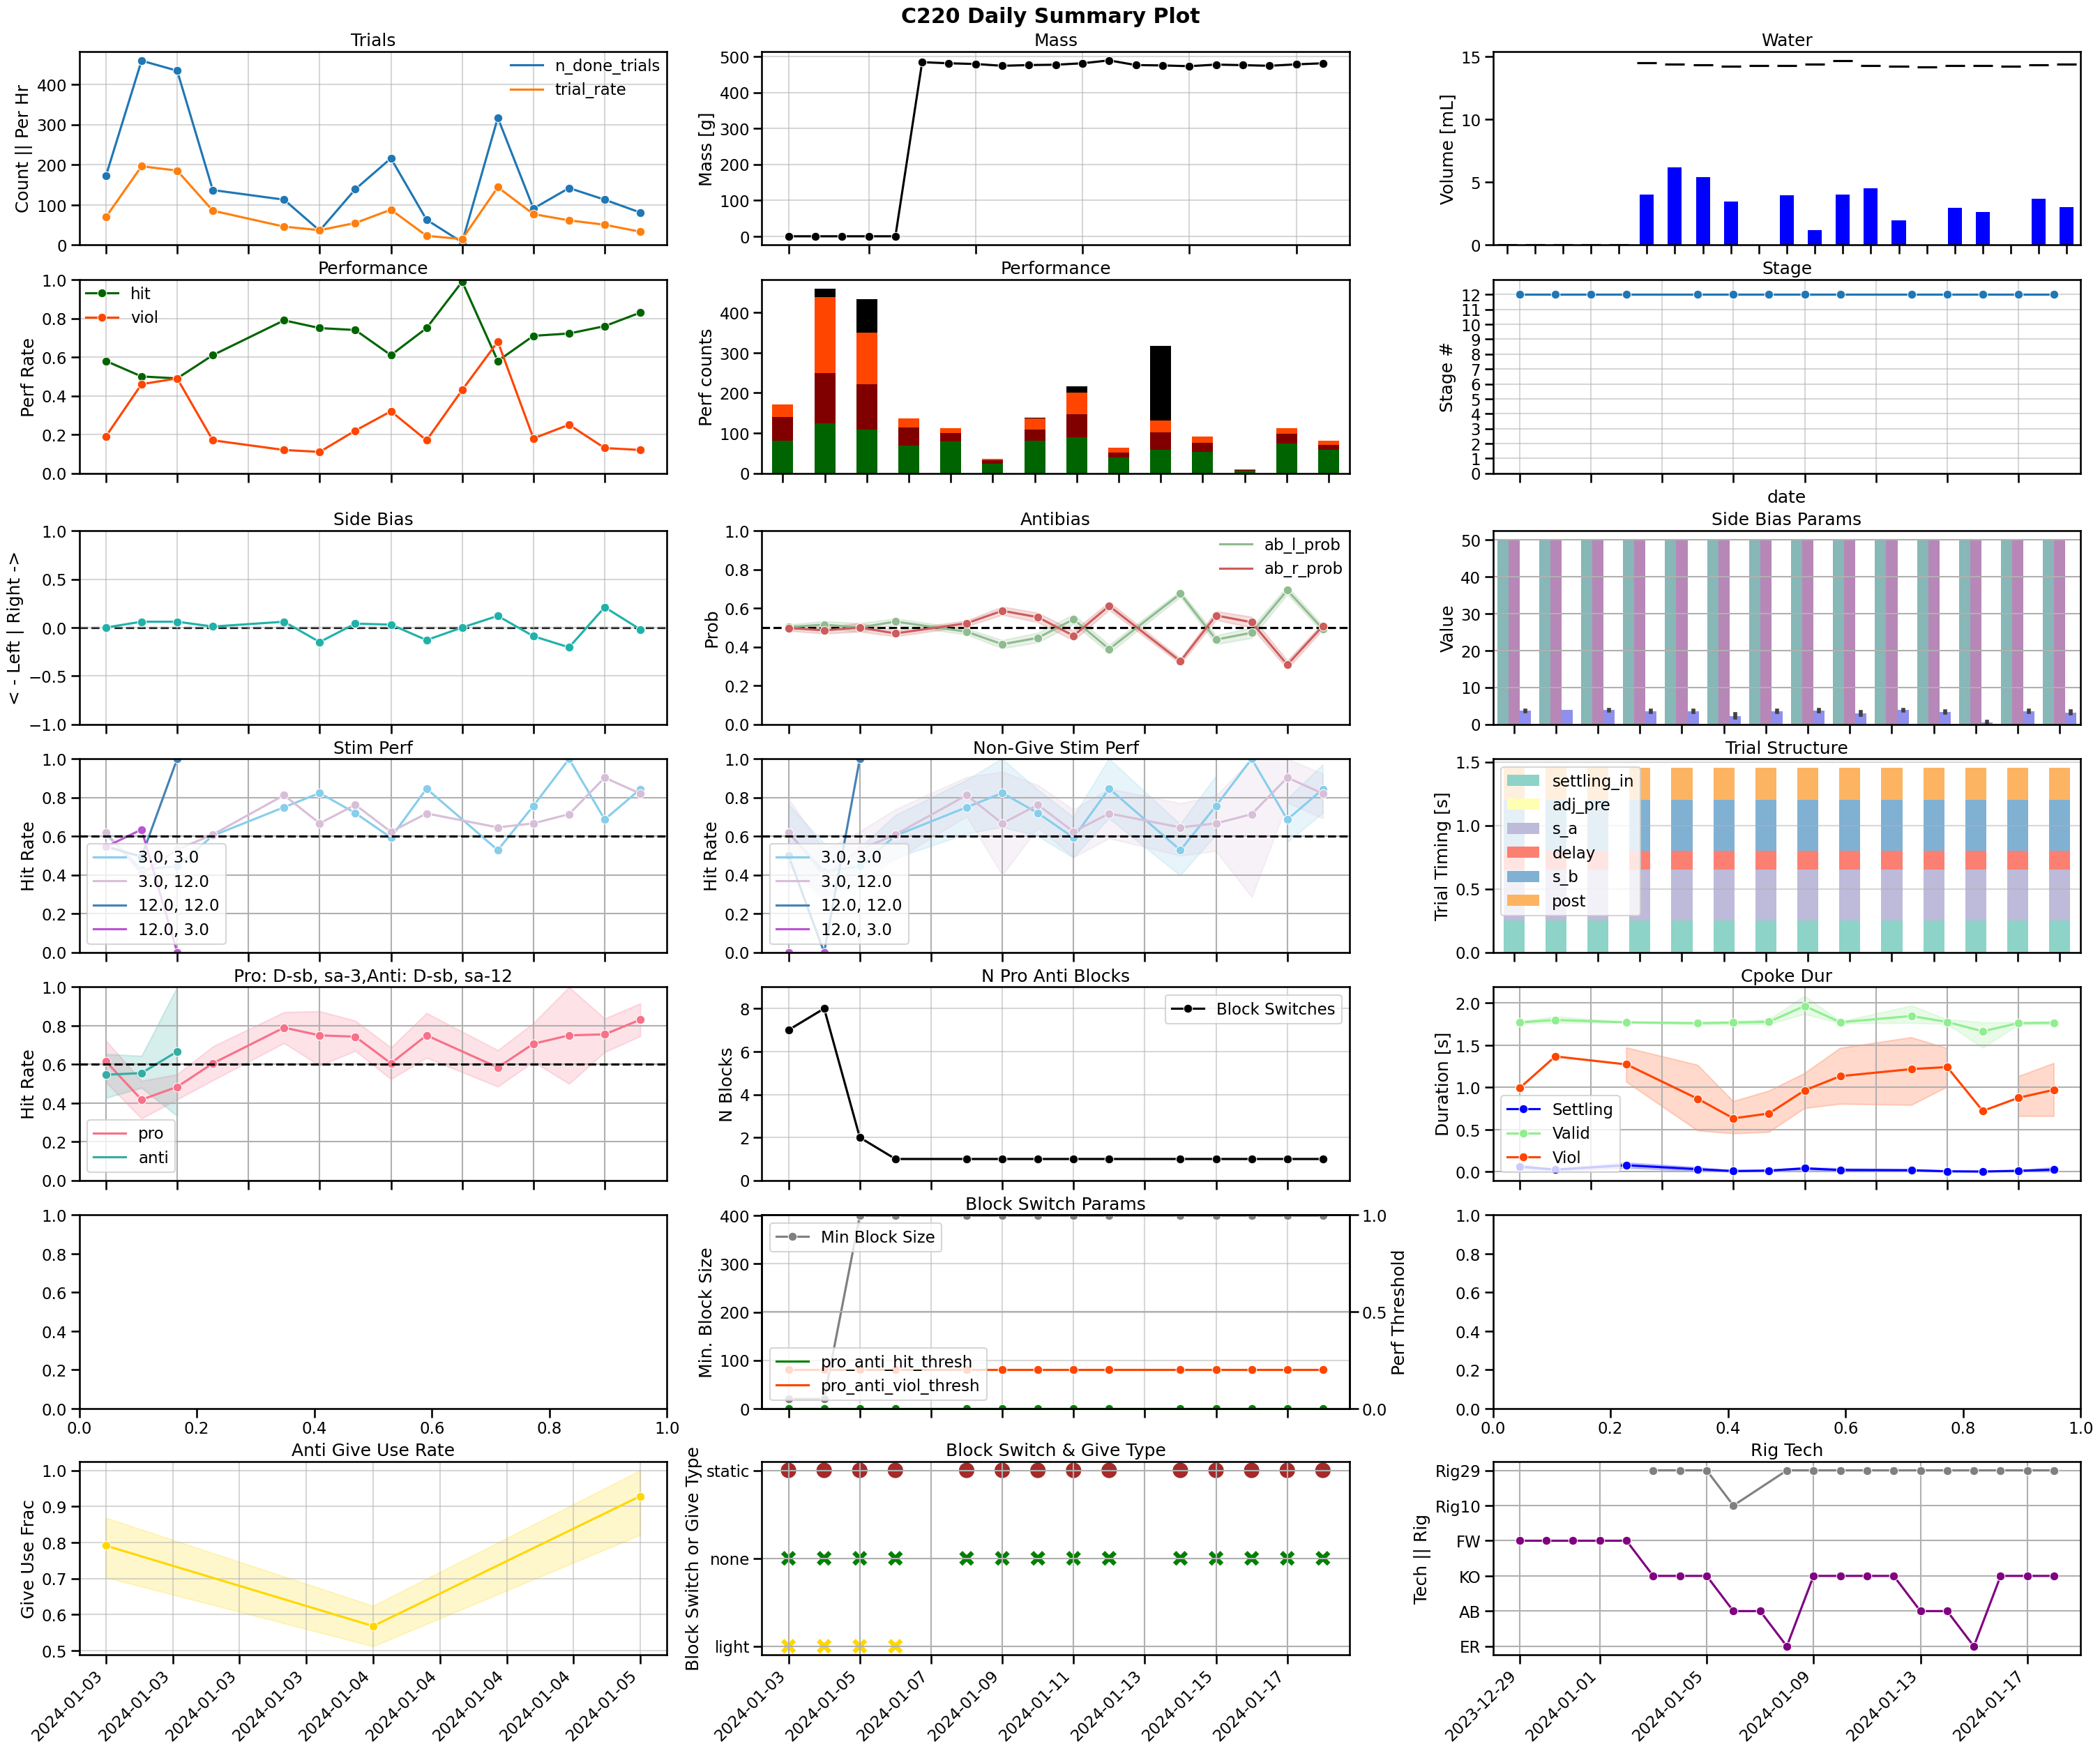

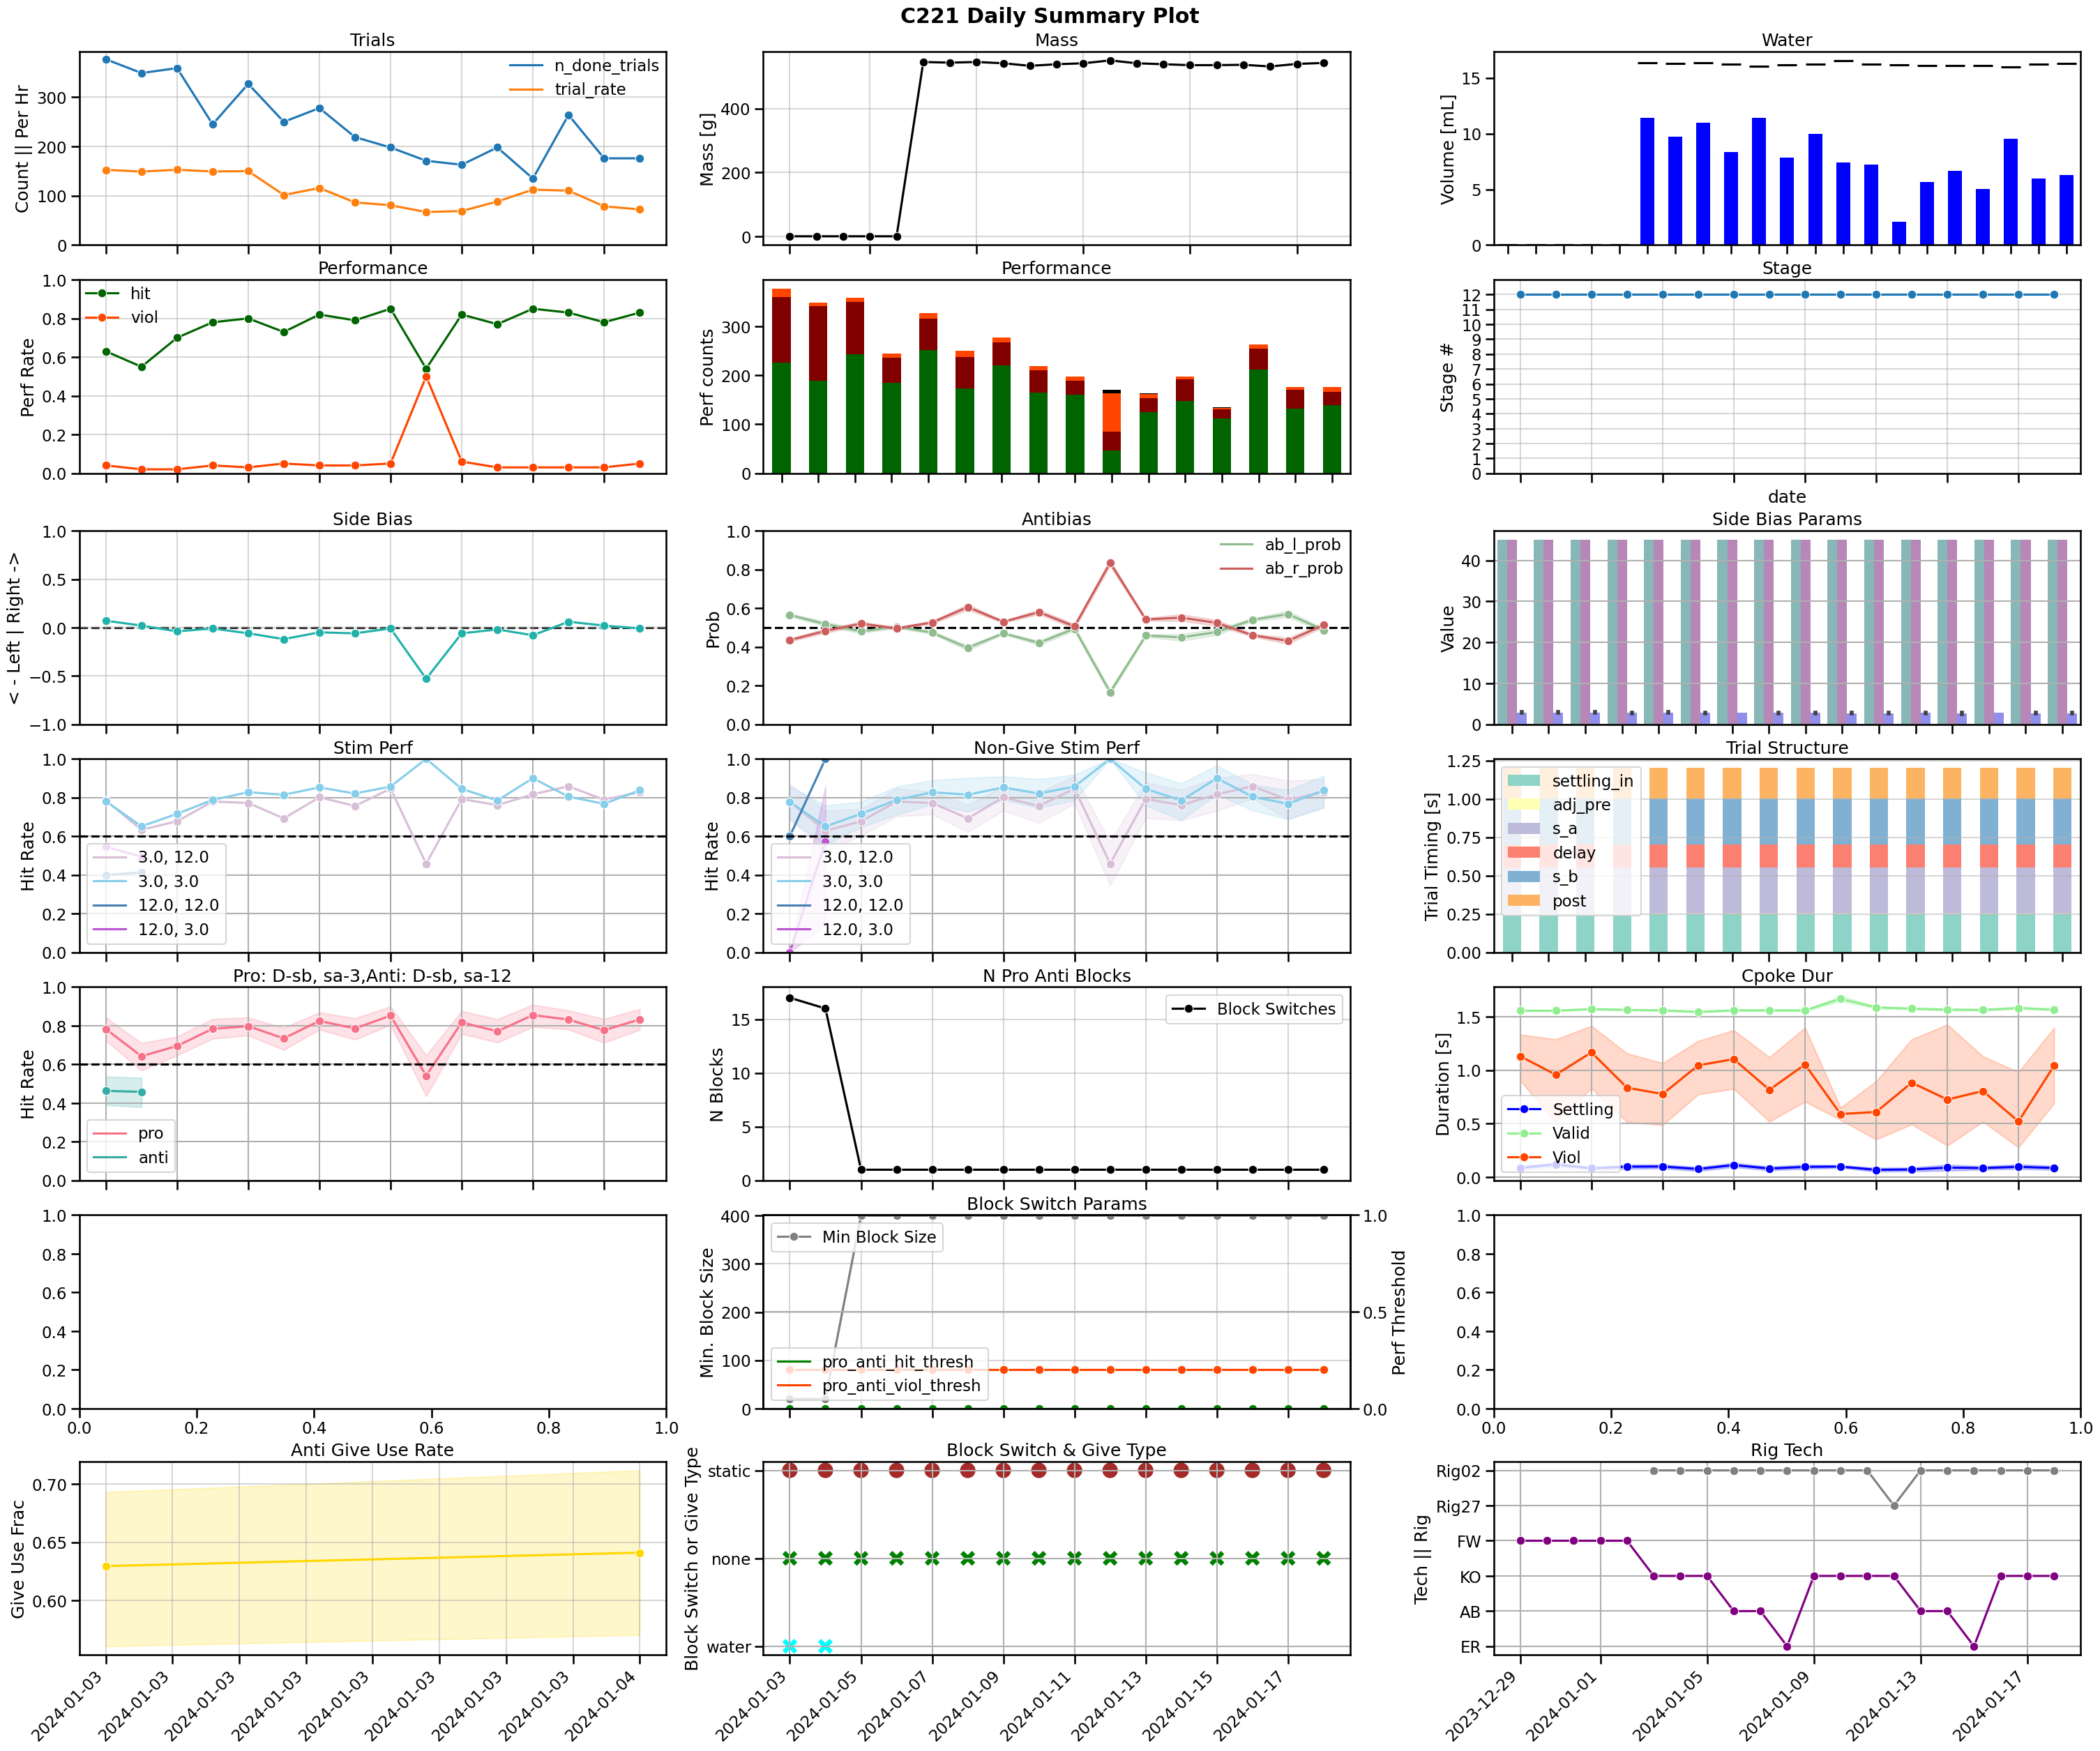

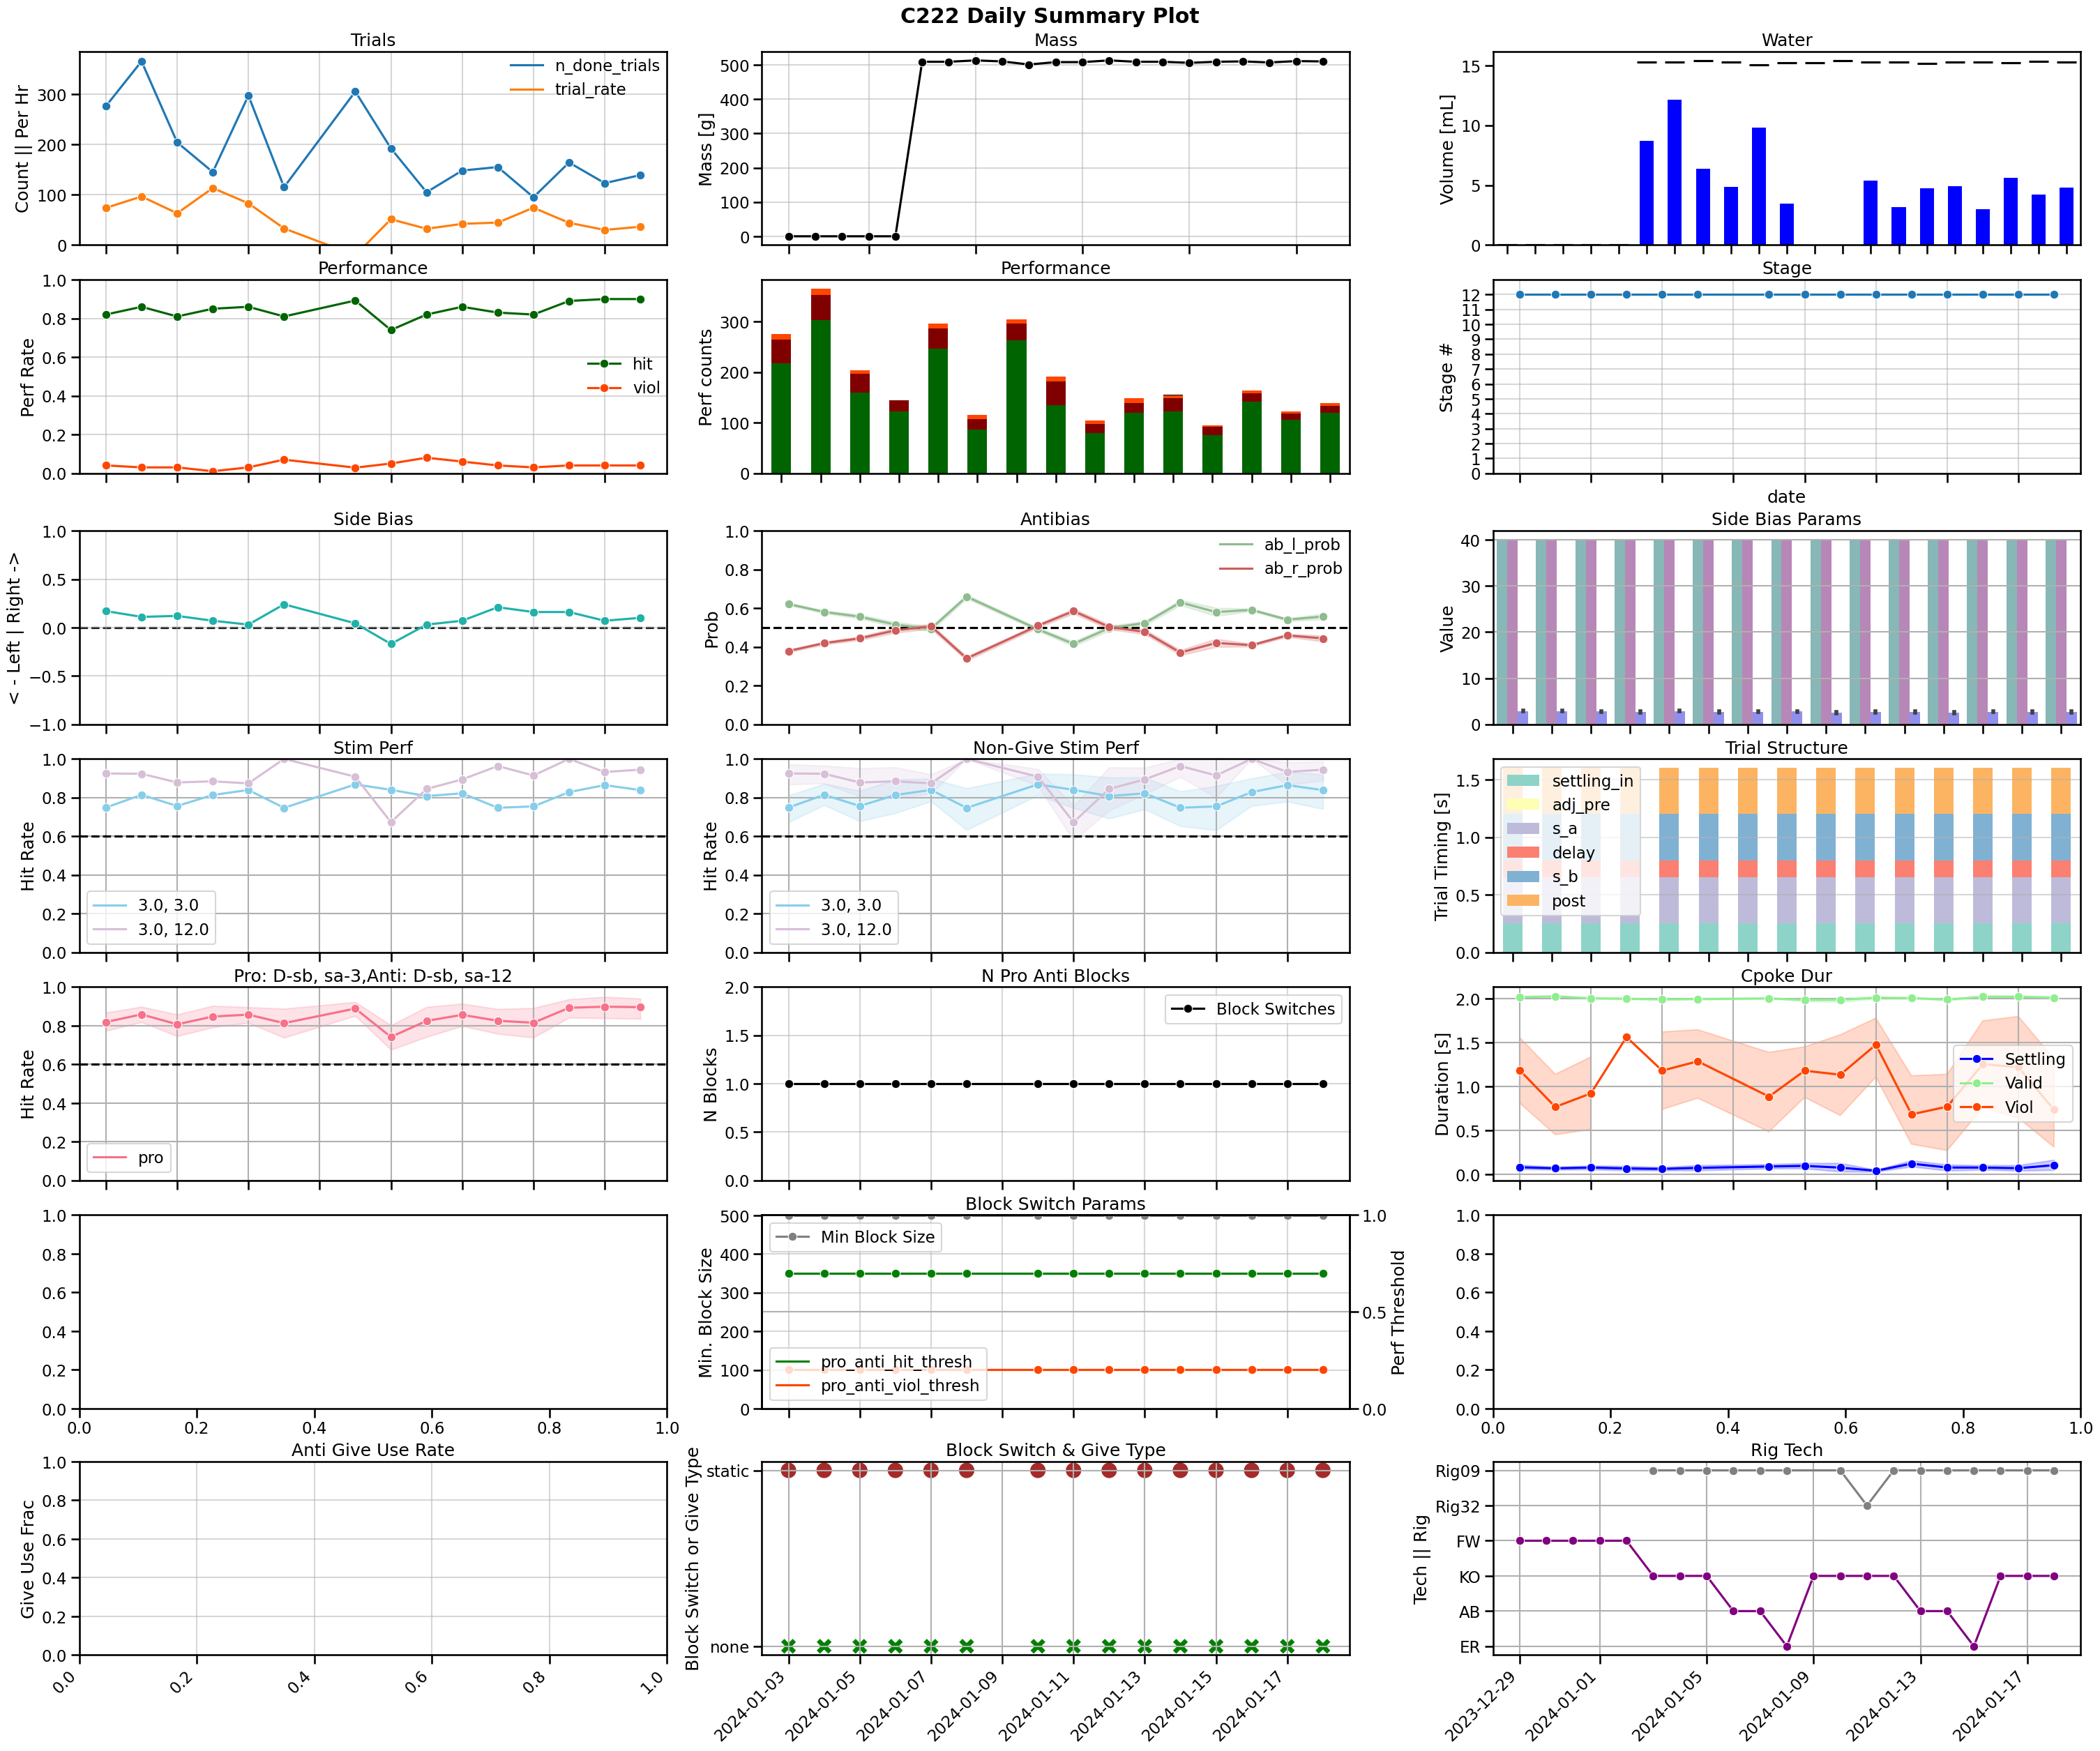

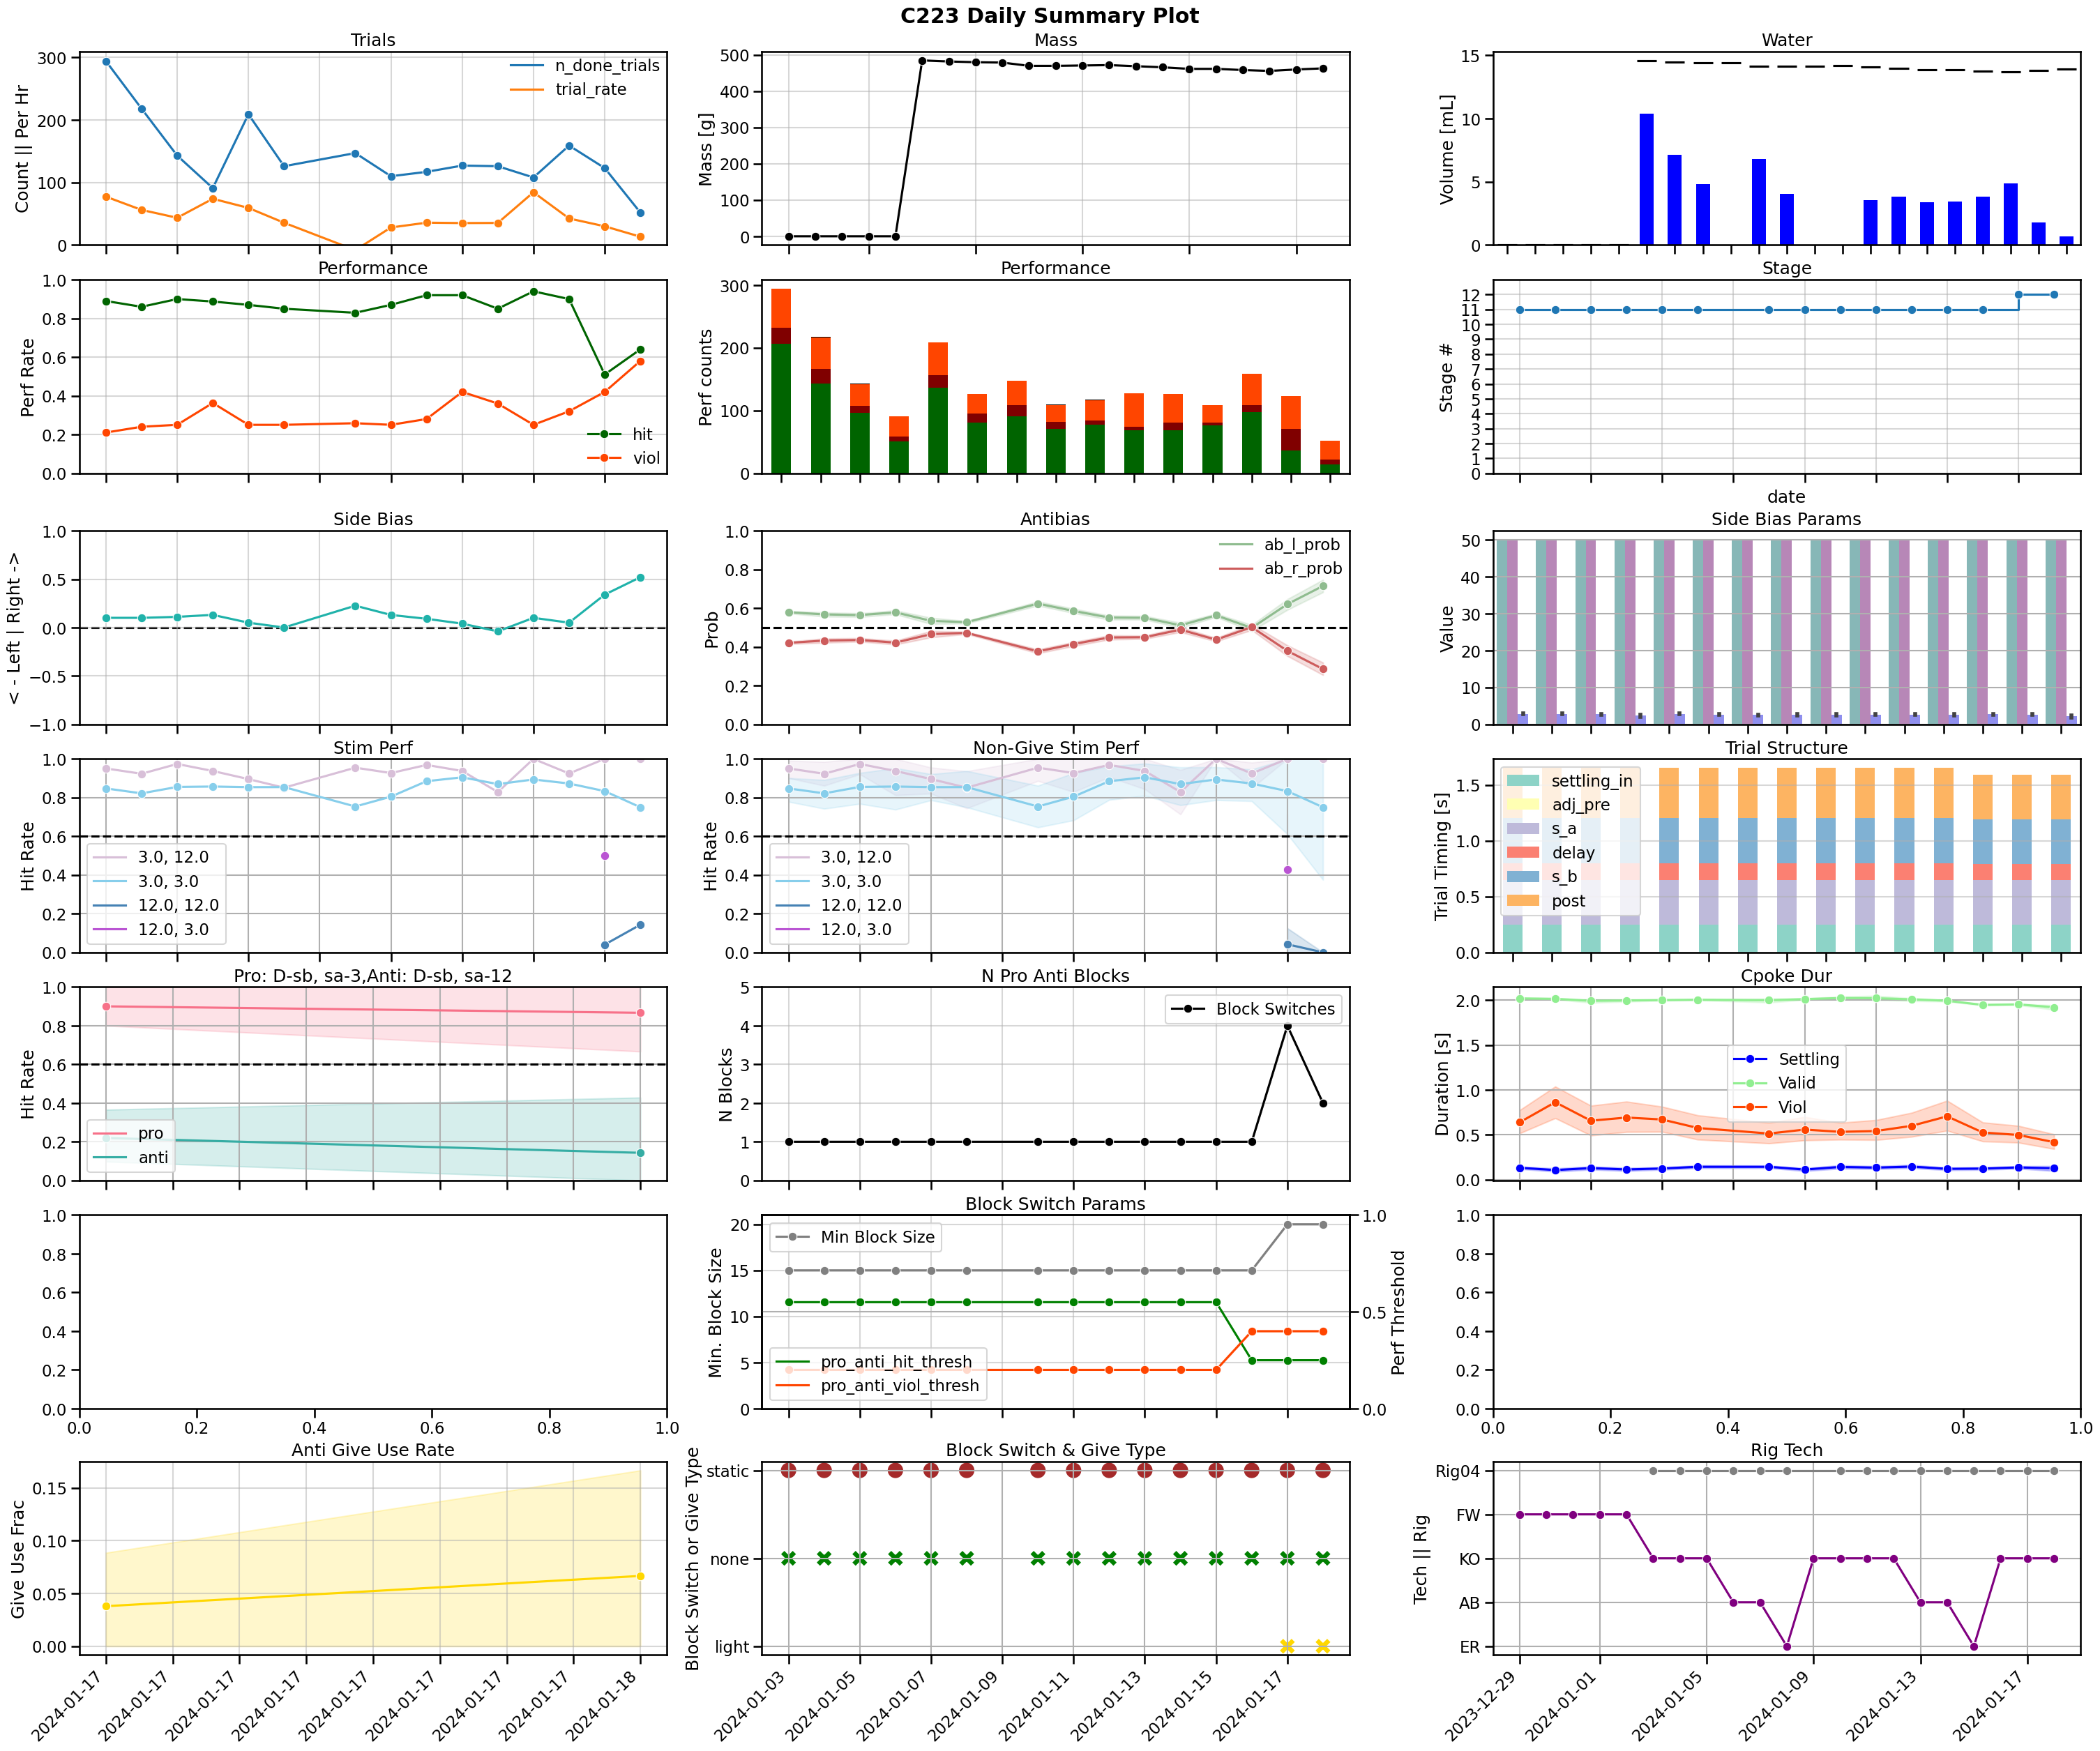

In [26]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [27]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C214_2024-01-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making C215_2024-01-18_day_summary
['adj_pre', 's_a', 'delay', 's_b', 'go']
skipping anti give del metrics
making C220_2024-01-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making C221_2024-01-18_day_summary
['s_a', 'go']
skipping anti give del metrics
making C222_2024-01-18_day_summary
['s_a', 's_b', 'go']
skipping anti give del metrics
making C223_2024-01-18_day_summary
['s_a', 's_b', 'post']
skipping stim/give plots due to hist error
